# Online Retail Lab

- [source](https://archive.ics.uci.edu/dataset/352/online+retail)

## Contexto

Este es un conjunto de datos transaccional que contiene todas las transacciones que tuvieron lugar entre el 12/01/2010 y el 12/09/2011 para un comercio minorista en línea sin tienda registrado y con sede en el Reino Unido. La empresa vende principalmente regalos únicos para todas las ocasiones. Muchos clientes de la empresa son mayoristas.

## Objetivo

Determinar las ventas a traves en el tiempo.
Poder saber cuanto se vende de acuerdo a:

- Dia de la semana
- dia de la semana y hora del dia 
- mes del año.

## Requirements

execute the following command to install the required packages:

```bash
pip install -r requirements.txt
```

## Se importa el set de datos.

In [32]:
"""Import data from excel file"""
import pandas
data = pandas.read_excel('OnlineRetail.xlsx')

## Se analiza el set de datos.

In [33]:
"""Get information about the data"""
# Muestra las primeras filas del DataFrame
print(data.head())
# Muestra información general del DataFrame
print(data.info())
# Obtiene el número de filas y columnas en el DataFrame
filas, columnas = data.shape
print(f'Número de filas: {filas}, Número de columnas: {columnas}')
# Obtiene los nombres de las columnas
print('Nombres de las columnas:', data.columns)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

## Funciones a reutilizar

Se crea una función para visualizar una columna en particular. La cual se utiliza para ver la distribución de los datos.

In [34]:
import matplotlib.pyplot as plt

def plot_hist_box(data, column):
    """Plot histogram and boxplot"""
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
    # Histograma
    data[column].hist(bins=50, edgecolor='black', ax=axes[0])  # Aumenta el número de bins
    axes[0].set_yscale('log')  # Escala logarítmica en el eje y
    axes[0].set_title(f'{column} Column Histogram')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[1].set_yscale('log') 

    # Diagrama de caja
    data.boxplot(column=column, ax=axes[1])
    axes[1].set_title(f'{column} Column Box Plot')
    axes[1].set_ylabel(column) 

    plt.tight_layout()
    plt.show()

## Agregado de columnas

Se agregan nuevas columnas para poder analizar los datos de una mejor manera.

In [35]:
"""Calculate new columns"""
# Calculates the 'Date' column'
data['Date'] = pandas.to_datetime(data['InvoiceDate'])
# Calculate the total (multiply the quantity by UnitPrice)
data['Total'] = data['Quantity'] * data['UnitPrice']

## Visualización de datos originales

- Se obtiene información sobre los datos.
- Se visualiza la cantidad de productos vendidos.
- Se visualiza el precio unitario.

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID                           Date          Total  
count  406829.000000                         541909  541909.000000  
mean    15287.690570  2011-07-04 13:34:57.156386048      17.987795  
min     12346.000000            2010-12-01 08:26:00 -168469.600000  
25%     13953.000000            2011-03-28 11:34:00       3.400000  
50%     15152.000000    

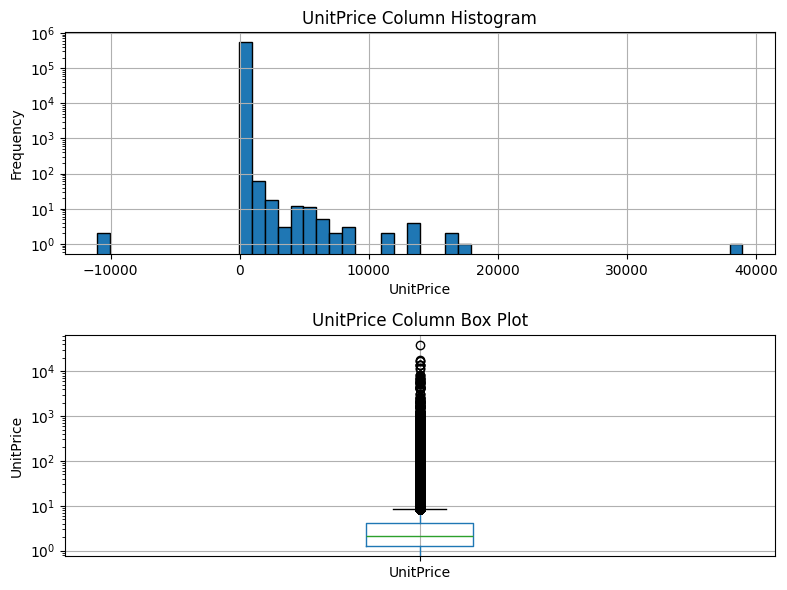

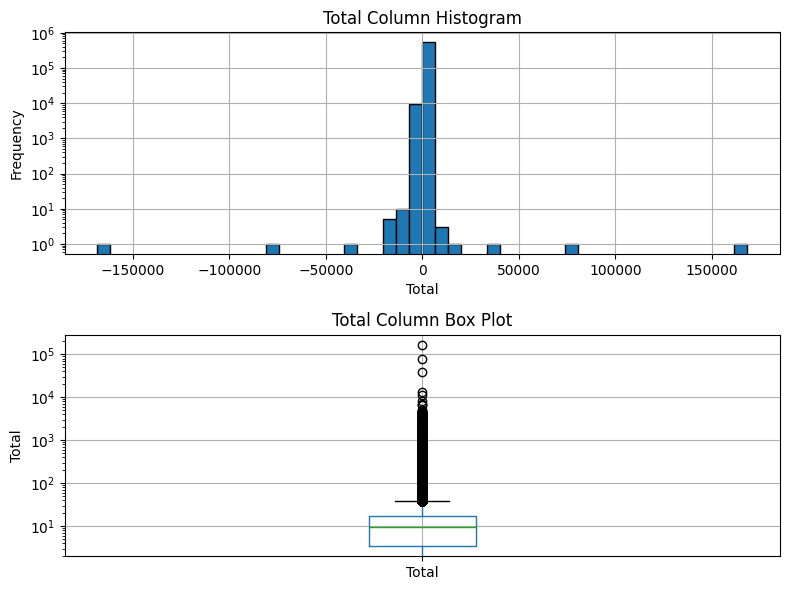

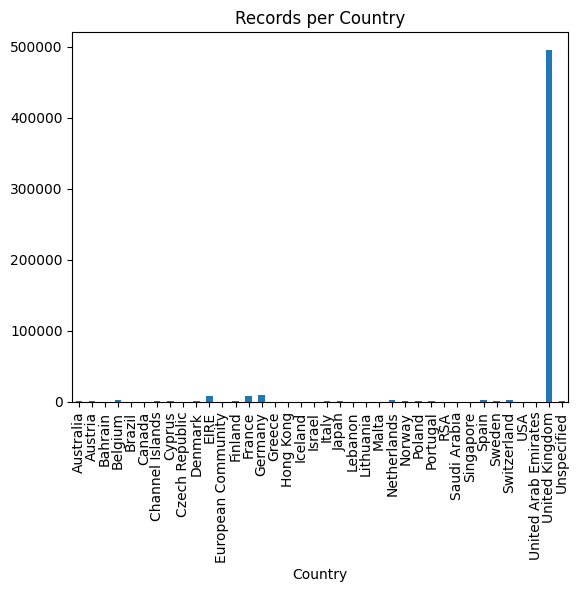

In [36]:
import matplotlib.pyplot as plt

print(data.describe())
plot_hist_box(data, 'UnitPrice')
plot_hist_box(data, 'Total')

"""Records per Country"""
result = data.groupby('Country')['InvoiceNo'].agg(Count='count').reset_index()
result.plot(kind='bar', x='Country', y='Count', legend=False)
plt.title('Records per Country')
plt.show()

## Análisis y limpieza de los datos:

De acuerdo a los datos se puede observar:

- hay valores negativos en la columna Quantity y UnitPrice.
- Valores outliers en la columna Quantity y UnitPrice.
- Datos que no corresponden a las ventas en el Reino Unido.

Se limpian los datos:

- Se eliminan los valores negativos.
- Se eliminan los valores outliers.
- Se eliminan los datos que no corresponden a las ventas en el Reino Unido.

In [42]:
"""Sanitize data"""
sanitized = data.loc[data['Total'] > 0 , :]
sanitized = sanitized.loc[data['UnitPrice'] > 0 , :]
sanitized = sanitized.loc[sanitized['UnitPrice'] < 1000, :]
sanitized = sanitized.loc[sanitized['Total'] < 5000, :]
sanitized = sanitized.loc[sanitized['Country'] == 'United Kingdom', :]

## Verificación de la limpieza de datos

Una realizada la limpieza de datos, se vuelve a obtener información sobre los datos.

- Se vuelve a obtener información sobre los datos.
- Se vuelve a visualizar la cantidad de productos vendidos.
- Se vuelve a visualizar el precio unitario.

            Quantity                    InvoiceDate      UnitPrice  \
count  485079.000000                         485079  485079.000000   
mean        9.275689  2011-07-04 12:26:01.484047104       3.653946   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         1.000000            2011-03-27 13:56:00       1.250000   
50%         3.000000            2011-07-19 15:23:00       2.100000   
75%        10.000000            2011-10-20 13:07:00       4.130000   
max      4800.000000            2011-12-09 12:49:00     988.000000   
std        36.041331                            NaN      12.873544   

          CustomerID                           Date          Total  
count  354306.000000                         485079  485079.000000  
mean    15552.489687  2011-07-04 12:26:01.484047104      17.782509  
min     12747.000000            2010-12-01 08:26:00       0.001000  
25%     14194.000000            2011-03-27 13:56:00       3.360000  
50%     15522.000000    

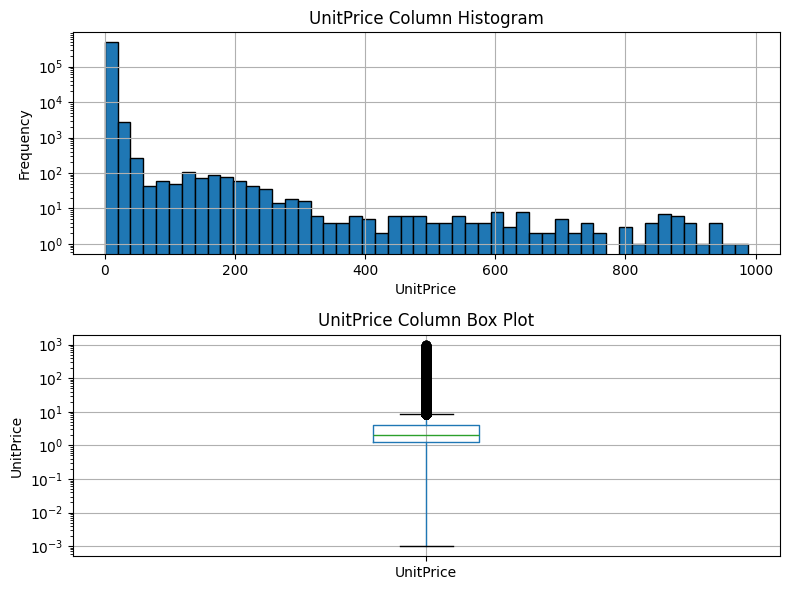

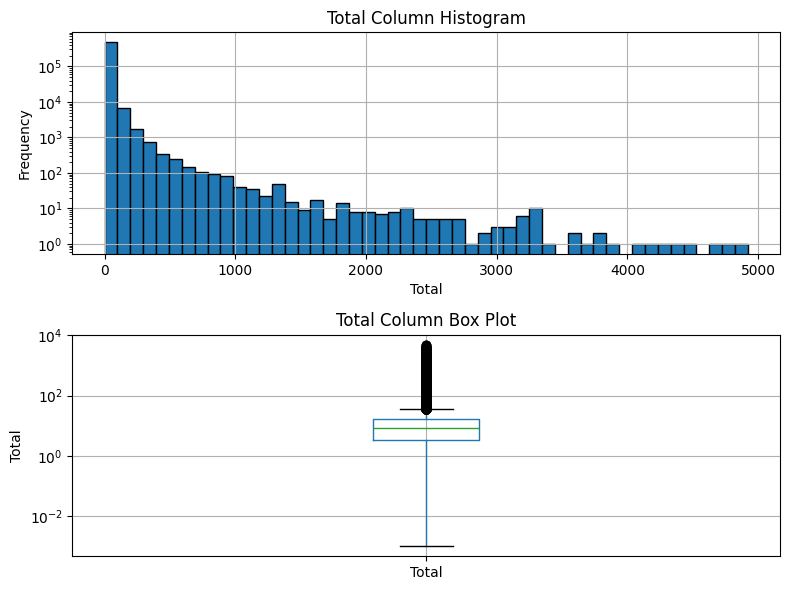

In [43]:
print(sanitized.describe())
plot_hist_box(sanitized, 'UnitPrice')
plot_hist_box(sanitized, 'Total')

## Análisis y visualización de los datos

Una vez que se verifica que los datos están limpios, se procede a analizar los datos.

- Se obtiene el monto total por ventas en dia de la semana.
- Se obtiene el monto total por ventas por hora del dia.
- Se obtiene el monto total por ventas por dia de la semana y hora del dia.
- Se obtiene la cantidad de ventas por mes del año.

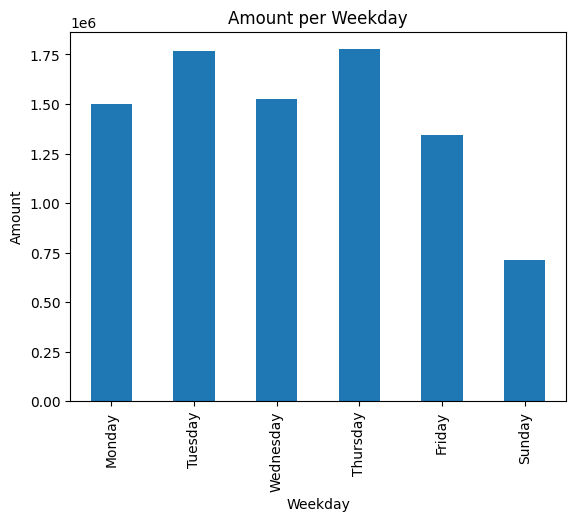

In [44]:

# Group by day of the week and calculate the sum of the total
result = sanitized.groupby(sanitized['Date'].dt.day_name()).agg({'Total': 'sum'}).reset_index()
# Defines the desired order of the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Convert 'InvoiceDate' column to category with desired order
result['Date'] = pandas.Categorical(result['Date'], categories=days, ordered=True)
# Sort the DataFrame by days of the week
result = result.sort_values('Date')
result.plot(kind='bar', x='Date', y='Total', legend=False)
plt.title('Amount per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Amount')
plt.show()


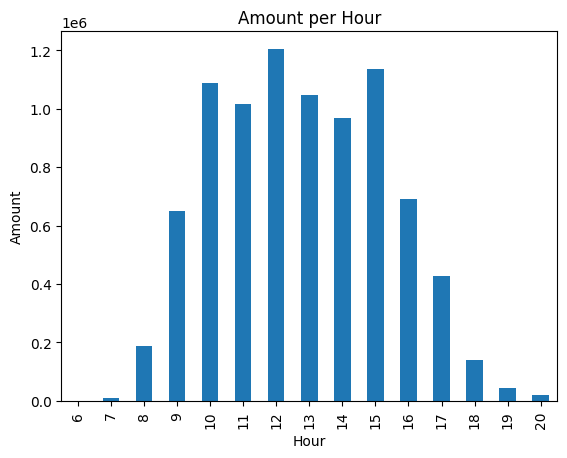

In [45]:
# Group by hour and calculate the sum of the total
result = sanitized.groupby(sanitized['Date'].dt.hour).agg({'Total': 'sum'}).reset_index()
result = result.sort_values('Date')
result.plot(kind='bar', x='Date', y='Total', legend=False)
plt.title('Amount per Hour')
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.show()

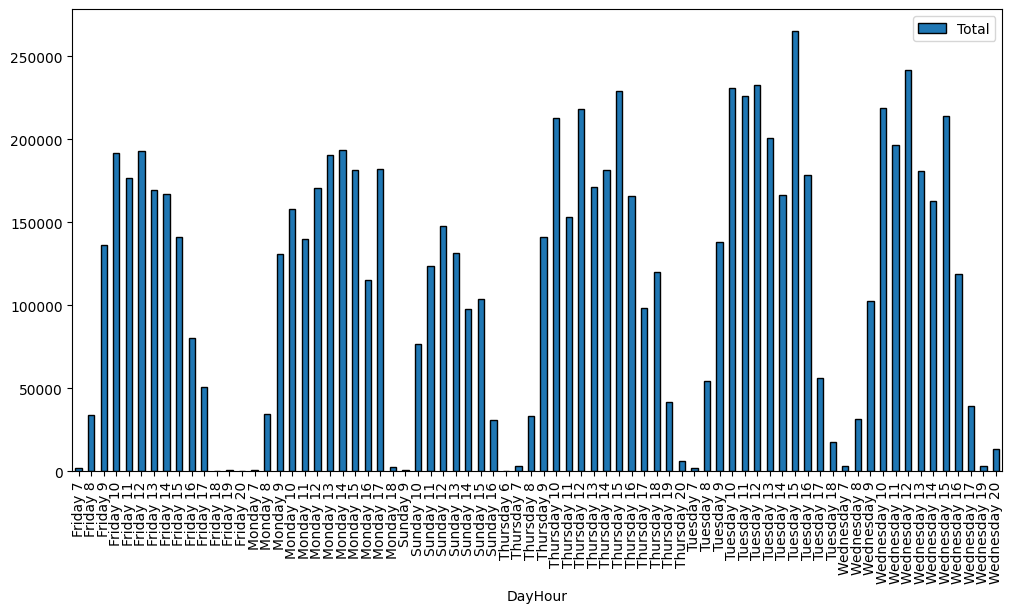

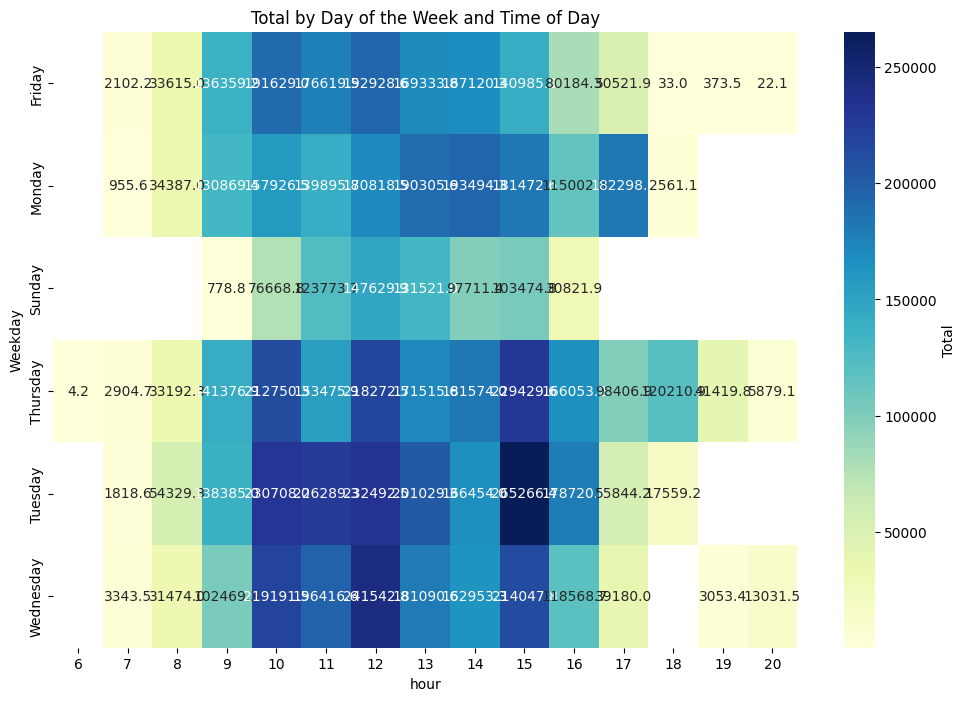

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
# Agrupa por día de la semana y hora del día y calcula la suma del total
sanitized['DayOfWeek'] = sanitized['Date'].dt.day_name()
sanitized['HourOfDay'] = sanitized['Date'].dt.hour

result = sanitized.groupby(['DayOfWeek', 'HourOfDay'])['Total'].sum().reset_index()
# Combina las columnas 'DayOfWeek' y 'HourOfDay' en una nueva columna 'DayHour'
result['DayHour'] = result['DayOfWeek'] + ' ' + result['HourOfDay'].astype(str)
result.plot(kind='bar', x='DayHour', y='Total', figsize=(12, 6), edgecolor='black')

# Crea un DataFrame pivot para facilitar la creación del heatmap
heatmap_data = result.pivot(index='DayOfWeek', columns='HourOfDay', values='Total')
# Gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Total'})
plt.title('Total by Day of the Week and Time of Day')
plt.xlabel('hour')
plt.ylabel('Weekday')

plt.show()

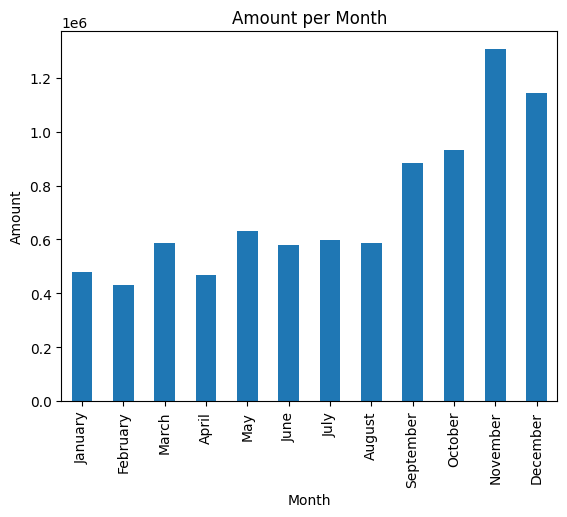

In [48]:
# Group by day of the week and calculate the sum of the total
result = sanitized.groupby(sanitized['Date'].dt.month_name()).agg({'Total': 'sum'}).reset_index()
# Defines the desired order of the days of the week
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
# # Convert 'InvoiceDate' column to category with desired order
result['Date'] = pandas.Categorical(result['Date'], categories=months, ordered=True)
# Sort the DataFrame by days of the week
result = result.sort_values('Date')
result.plot(kind='bar', x='Date', y='Total', legend=False)
plt.title('Amount per Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

## Conclusiones

- Se puede observar que los días que mas se vende son los martes y jueves.
- Se puede observar que la mayoría de las ventas se realizan de las 9 a las 17.
- Se puede observar que las horas que mas se vende son las 12 y las 15.
- Se puede observar que los días que mas se vende son los jueves y los martes a las 12 y las 15.
- Se puede observar que las ventas aumentan a partir de septiembre y llegan a su pico en noviembre y diciembre.